In [1722]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [1723]:
df=pd.read_csv("weather3.csv",index_col='Date & Time')

In [1724]:
df.index=pd.to_datetime(df.index)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_7508\1954437206.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [1725]:
df.index

DatetimeIndex(['2024-02-17 16:30:00', '2024-02-17 16:45:00',
               '2024-02-17 17:00:00', '2024-02-17 17:15:00',
               '2024-02-17 17:30:00', '2024-02-17 17:45:00',
               '2024-02-17 18:00:00', '2024-02-17 18:15:00',
               '2024-02-17 18:30:00', '2024-02-17 18:45:00',
               ...
               '2024-06-19 15:30:00', '2024-06-19 15:45:00',
               '2024-06-19 16:00:00', '2024-06-19 16:15:00',
               '2024-06-19 16:30:00', '2024-06-19 16:45:00',
               '2024-06-19 17:00:00', '2024-06-19 17:15:00',
               '2024-06-19 17:30:00', '2024-06-19 17:45:00'],
              dtype='datetime64[ns]', name='Date & Time', length=11652, freq=None)

In [1726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11652 entries, 2024-02-17 16:30:00 to 2024-06-19 17:45:00
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inside Temp - °C        11652 non-null  int64  
 1   High Inside Temp - °C   11652 non-null  int64  
 2   Low Inside Temp - °C    11652 non-null  int64  
 3   Inside Hum - %          11652 non-null  int64  
 4   High Inside Hum - %     11652 non-null  int64  
 5   Low Inside Hum - %      11652 non-null  int64  
 6   Inside Dew Point - °C   11652 non-null  int64  
 7   Inside Heat Index - °C  11652 non-null  int64  
 8   Barometer - mb          11652 non-null  float64
 9   High Bar - mb           11652 non-null  float64
 10  Low Bar - mb            11652 non-null  float64
 11  Absolute Pressure - mb  11652 non-null  float64
 12  Low Wind Chill - °C     11652 non-null  float64
 13  Heat Index - °C         11652 non-null  float64
 14  Hea

In [1727]:
df.corr()['Temp - °C'].sort_values()

Absolute Pressure - mb   -0.563009
Barometer - mb           -0.563009
Low Bar - mb             -0.561774
High Bar - mb            -0.561769
Low Hum - %              -0.558820
Hum - %                  -0.532895
High Hum - %             -0.528242
Low Inside Hum - %       -0.437502
Inside Hum - %           -0.432006
High Inside Hum - %      -0.427669
High AQI                 -0.234554
AQI                      -0.232293
Inside Dew Point - °C    -0.225707
PM 2.5 - ug/m³           -0.193578
PM 10 - ug/m³            -0.192603
High PM 2.5 - ug/m³      -0.176415
High PM 10 - ug/m³       -0.171843
Heating Degree Days      -0.164153
PM 1 - ug/m³             -0.136037
High PM 1 - ug/m³        -0.135505
Inside Heat Index - °C    0.009524
High Inside Temp - °C     0.043138
Inside Temp - °C          0.044330
Low Inside Temp - °C      0.045076
Low Dew Point - °C        0.288191
Dew Point - °C            0.337210
High Dew Point - °C       0.370943
Low Wet Bulb - °C         0.433819
Wet Bulb - °C       

In [1728]:
from sklearn.model_selection import train_test_split

In [1729]:
#X =  df.drop('Temp - °C',axis=1).values
#X=df[['Hum - %','Low Hum - %','High Hum - %','High Heat Index - °C','Heat Index - °C.1','Cooling Degree Days']]
X=df[['Hum - %','Low Hum - %','High Hum - %','Dew Point - °C','High Dew Point - °C','Low Dew Point - °C','High Wet Bulb - °C','Wet Bulb - °C','Low Wet Bulb - °C']]
y = df['Temp - °C'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [1730]:
X_train.shape

(9321, 9)

In [1731]:
X_test.shape

(2331, 9)

In [1732]:
from sklearn.preprocessing import MinMaxScaler

In [1733]:
scaler = MinMaxScaler()

In [1734]:
X_train= scaler.fit_transform(X_train)

In [1735]:
X_test = scaler.transform(X_test)

In [1736]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [1737]:
model = Sequential()


model.add(Dense(units=2000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=250,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam')

In [1738]:
from tensorflow.keras.callbacks import EarlyStopping

In [1739]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [1740]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=230,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/230


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 172.9919 - val_loss: 1.8541
Epoch 2/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4163 - val_loss: 0.8990
Epoch 3/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.2936 - val_loss: 1.5115
Epoch 4/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.5946 - val_loss: 0.2167
Epoch 5/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.5550 - val_loss: 0.7569
Epoch 6/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.6970 - val_loss: 0.2789
Epoch 7/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4724 - val_loss: 0.4260
Epoch 8/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.5768 - val_loss: 0.1663
Epoch 9/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.5339 - val_loss: 1.0663
Epoch 10/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.3261 - val_loss: 0.4970
Epoch 11/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.3695 - val_loss: 0.4420
Epoch 12/230
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/st

In [1741]:
model_loss = pd.DataFrame(model.history.history)
model_loss.iplot()

In [1742]:
model.metrics_names

['loss']

In [1743]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [1744]:
if test_score > 1.5 * training_score:
    print("The model might be overfitting.")
elif training_score > 0.5 and test_score > 0.5:
    print("The model might be underfitting.")
else:
    print("The model seems to have a good balance between bias and variance.")

The model seems to have a good balance between bias and variance.


In [1745]:
training_score

0.15739652514457703

In [1746]:
test_score

0.15640470385551453

In [1747]:
predictions = model.predict(X_test)
pred = np.round(predictions).astype(int)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [1748]:
from sklearn import metrics

In [1749]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.32137837403836245
MSE: 0.15640473951124806
RMSE: 0.3954803908049653


In [1750]:
df['Temp - °C'].describe()

count    11652.000000
mean        30.465585
std          3.017945
min         19.000000
25%         29.000000
50%         30.000000
75%         32.000000
max         40.000000
Name: Temp - °C, dtype: float64

In [1751]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [1752]:
test_predictions = pd.Series(predictions.reshape(2331,))

In [1753]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [1754]:
pred_df.columns = ['Test Y','Model Predictions']

In [1755]:
pred_df

,Test Y,Model Predictions
0,31.0,31.000278
1,34.0,33.616249
2,28.0,28.796644
3,33.0,33.104298
4,31.0,30.729443
...,...,...
2326,27.0,26.736971
2327,31.0,30.736332
2328,29.0,29.214294
2329,35.0,34.819328


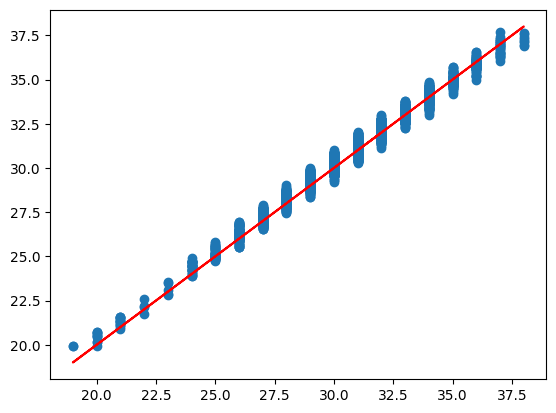

In [1756]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [1757]:
from sklearn.metrics import classification_report,confusion_matrix

In [1758]:
predictions.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1759]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        19.0       0.00      0.00      0.00         2
        20.0       0.75      0.55      0.63        11
        21.0       0.69      0.73      0.71        15
        22.0       0.43      0.75      0.55         4
        23.0       0.75      0.60      0.67         5
        24.0       0.91      0.61      0.73        33
        25.0       0.71      0.78      0.74        41
        26.0       0.89      0.73      0.80        98
        27.0       0.82      0.74      0.78       168
        28.0       0.75      0.77      0.76       183
        29.0       0.82      0.72      0.77       284
        30.0       0.75      0.77      0.76       351
        31.0       0.76      0.78      0.77       368
        32.0       0.73      0.80      0.76       254
        33.0       0.71      0.82      0.76       163
        34.0       0.82      0.80      0.81       154
        35.0       0.78      0.91      0.84        93
        36.0       0.80    

C:\Users\KIIT0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\KIIT0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\KIIT0001\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div